## Estimando Curvas Normales

### Desafio 1:
- Utilice la base de datos de un compañero creada en la sesión pasada

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from anc_functions import *
from scipy import stats

In [2]:
df_full = pd.read_csv("qog_std_cs_jan18.csv")

In [3]:
df = pd.read_csv("subdample_sf_demo.csv").drop(columns = ["Unnamed: 0"])
df

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wdi_expedu,wdi_ners
0,0.479,AFG,8,1282.6400,29.825001,8.1,3.78028,48.750320
1,0.762,ALB,1,8516.7002,NaN,7.1,3.53944,85.278214
2,0.743,DZA,3,5402.1699,39.113998,5.1,NaN,NaN
3,0.857,AND,5,32367.3300,NaN,NaN,2.99781,NaN
4,0.531,AGO,4,3771.2000,25.789000,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...
189,0.697,UZB,1,7370.7202,29.746000,6.3,NaN,92.207382
190,0.769,VEN,2,10513.9600,NaN,5.2,NaN,74.789711
191,0.702,WSM,9,3167.7500,0.192000,8.9,NaN,79.545982
192,0.499,YEM,3,2170.9299,NaN,7.5,NaN,41.721760


## Desafío 2: 

* Genere un archivo  ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
* Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [4]:
reporte_perdidos(df, df.columns)

,variable,perdidos,% de datos perdidos
7,wdi_ners,61,0.31
6,wdi_expedu,54,0.28
4,imf_pop,49,0.25
5,ffp_hf,17,0.09
0,undp_hdi,8,0.04
3,gle_cgdpc,2,0.01
1,ccodealp,0,0.00
2,ht_region,0,0.00


## Desafío 3: 

* Estime  el  puntaze  Z  para  las  10  primeras  y  últimas  observaciones  de  las  variables  con  una  menor cantidad de datos perdidos
    - Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula:  
    $$ zi = \frac {(xi - nx)}{dsx}$$
    - Para ordenar los valores pueden utilzar la función  sort_values del  DataFrame analizado.
    - Lean la documentación asociada al argumento  by . Para evitar conflictos en la sobreescritura
    - Asegúrense de eliminar las observaciones que tengan valores perdidos con  dropna . Lean la documentación asociada al método  subset .
    - Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [5]:
dsx = df["gle_cgdpc"].std()
nx = df["gle_cgdpc"].mean()

In [6]:
df["z_gle_cgdpc"] = (df["gle_cgdpc"]- nx) /dsx

In [7]:
df = df.sort_values(by = "z_gle_cgdpc")

In [8]:
df = df.dropna(subset=["z_gle_cgdpc"])

In [9]:
df.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wdi_expedu,wdi_ners,z_gle_cgdpc
41,0.425,COD,4,324.16000,NaN,7.1,2.24535,NaN,-0.778953
52,0.678,SLV,2,332.26999,NaN,6.9,3.44857,70.171722,-0.778500
97,0.427,LBR,4,488.26999,NaN,6.6,2.75756,NaN,-0.769792
125,0.351,NER,4,644.53998,NaN,6.9,6.70941,15.665040,-0.761070
26,0.406,BDI,4,663.57001,NaN,6.8,5.41642,24.948179,-0.760007
32,0.347,CAF,4,690.03998,NaN,6.9,1.22393,13.600750,-0.758530
102,0.511,MDG,4,822.62000,NaN,6.1,2.08204,31.080410,-0.751129
116,0.414,MOZ,4,852.39001,25.733,7.4,6.48322,19.439980,-0.749467
54,0.441,ETH,4,900.77002,88.347,7.0,4.50051,30.274250,-0.746767
103,0.473,MWI,4,938.34998,17.604,8.1,4.84254,32.942291,-0.744669


In [10]:
df.tail(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wdi_expedu,wdi_ners,z_gle_cgdpc
80,0.920,IRL,5,46422.070,4.621000,2.8,5.32457,99.573357,1.794204
186,0.918,USA,5,47769.699,318.789001,1.5,5.38078,90.462288,1.869428
168,0.938,CHE,5,50454.410,8.140000,2.1,5.09608,84.246483,2.019287
155,0.924,SGP,7,54268.148,5.470000,3.3,2.91579,NaN,2.232168
127,0.948,NOR,5,57634.770,5.156000,1.6,7.37329,95.201927,2.420090
101,0.896,LUX,5,61404.480,0.550000,2.1,4.08388,84.603470,2.630513
91,0.799,KWT,3,64342.711,3.999000,3.1,NaN,83.578850,2.794524
99,0.911,LIE,5,102243.520,NaN,NaN,2.55604,91.538719,4.910124
141,0.855,QAT,3,104049.440,2.045000,3.1,3.60719,72.464622,5.010929
111,NaN,MCO,5,108481.130,NaN,NaN,1.02195,NaN,5.258303


In [11]:
dsx = df["undp_hdi"].std()
nx = df["undp_hdi"].mean()

In [12]:
df["z_undp_hdi"] = (df["undp_hdi"]- nx) /dsx

In [13]:
df1 = df.sort_values(by = "z_undp_hdi").dropna(subset=["z_undp_hdi"])

In [14]:
df1.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wdi_expedu,wdi_ners,z_gle_cgdpc,z_undp_hdi
32,0.347,CAF,4,690.03998,NaN,6.9,1.22393,13.600750,-0.758530,-2.281653
125,0.351,NER,4,644.53998,NaN,6.9,6.70941,15.665040,-0.761070,-2.255682
34,0.394,TCD,4,1651.05000,NaN,8.6,2.84971,NaN,-0.704887,-1.976501
187,0.399,BFA,4,1095.96000,16.500,6.9,4.60476,26.492809,-0.735872,-1.944038
26,0.406,BDI,4,663.57001,NaN,6.8,5.41642,24.948179,-0.760007,-1.898590
70,0.414,GIN,4,993.83002,11.745,7.2,3.20817,31.788179,-0.741572,-1.846649
116,0.414,MOZ,4,852.39001,25.733,7.4,6.48322,19.439980,-0.749467,-1.846649
55,0.418,ERI,4,1007.28000,NaN,7.6,NaN,28.415560,-0.740822,-1.820678
139,0.421,GNB,4,961.26001,NaN,8.5,2.17313,NaN,-0.743390,-1.801201
41,0.425,COD,4,324.16000,NaN,7.1,2.24535,NaN,-0.778953,-1.775230


In [15]:
df1.tail(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wdi_expedu,wdi_ners,z_gle_cgdpc,z_undp_hdi
30,0.919,CAN,5,36577.078,35.495998,2.2,5.28122,NaN,1.244663,1.432111
75,0.919,ISL,5,31313.609,0.329000,2.8,7.80585,87.681770,0.950859,1.432111
80,0.920,IRL,5,46422.070,4.621000,2.8,5.32457,99.573357,1.794204,1.438604
121,0.923,NLD,5,42258.352,16.865000,2.6,5.52938,93.882019,1.561788,1.458081
48,0.923,DNK,5,37406.762,5.627000,1.9,8.62711,89.817459,1.290975,1.458081
64,0.924,DEU,5,39486.699,80.983002,2.1,4.95219,NaN,1.407076,1.464574
155,0.924,SGP,7,54268.148,5.470000,3.3,2.91579,NaN,2.232168,1.464574
8,0.937,AUS,5,38611.949,23.621000,1.0,5.22534,87.572853,1.358248,1.548977
168,0.938,CHE,5,50454.410,8.140000,2.1,5.09608,84.246483,2.019287,1.555470
127,0.948,NOR,5,57634.770,5.156000,1.6,7.37329,95.201927,2.420090,1.620396


## Desafío 4:

Estime el puntaje z de las regiones.Para  ello,  modifique la  función  para  generar  dotplots  de  la  semana  pasada,  donde  deberá  agregar una opción al argumento  statistic para calcular el puntaje z.

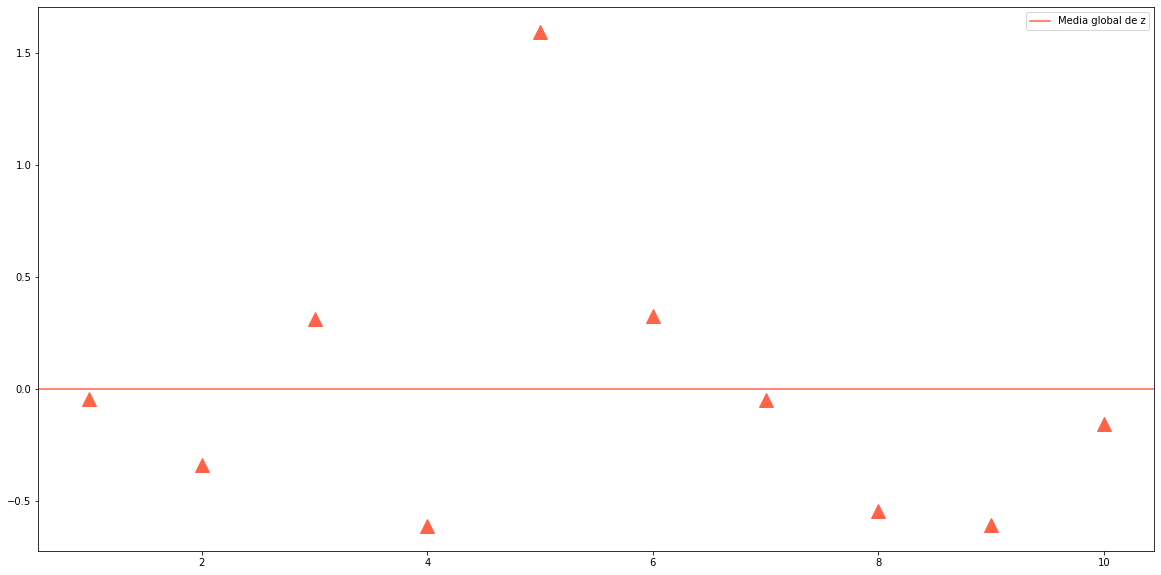

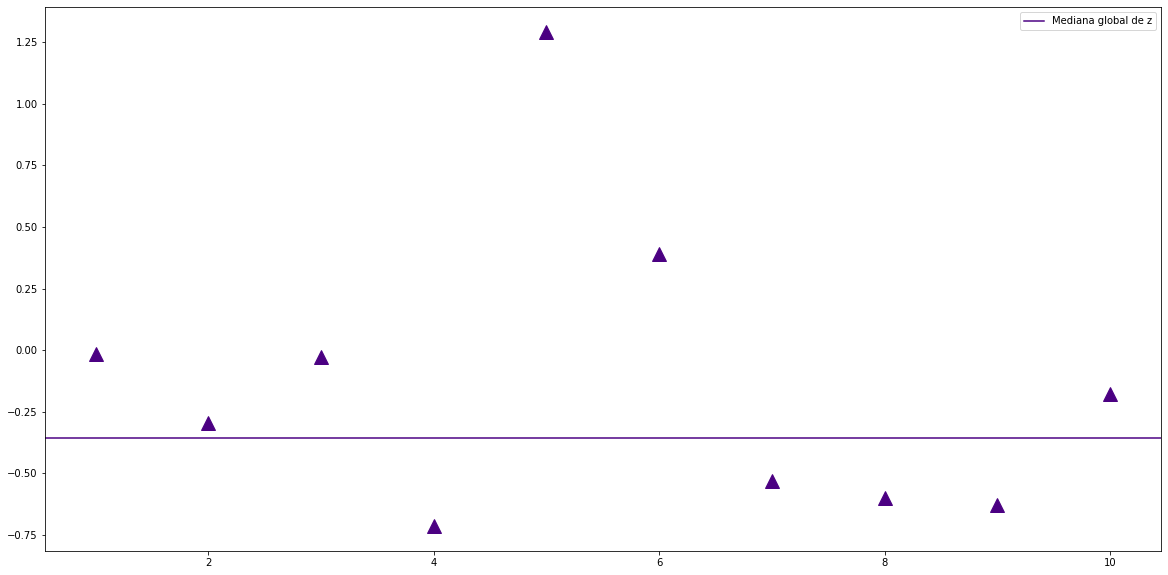

In [16]:
dotplot(df,"gle_cgdpc", "ht_region", use_zscore= True, global_state = True, df_completo =df_full)
dotplot(df,"gle_cgdpc", "ht_region", statistic= "median", color="indigo", use_zscore= True, global_state = True, df_completo =df_full)

## Desafío 5:

Genere un método que devuelva un gráfico comparando dos curvas de densidad

El método debe contener los siguientes argumentos:
* df1 : Tabla de datos 1.
* df2 : Tabla de datos 2.
* variable : Variable a contrastar.
* log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False.

In [17]:
df1 = pd.read_csv("subdample_np_demo.csv")
df2 = df

In [18]:
def curva_densidad(df1, df2, var, log=False, puntos = 150):
        
    aux1 = df1[var]
    aux2 = df2[var]
    
    if log is False:
        aux1 = np.log(aux1)
        aux2 = np.log(aux2)
        
        
    mu1 = aux1.mean()
    mu2 = aux2.mean()
    sigma1 = aux1.std()
    sigma2 = aux2.std()

    x1 = np.linspace(aux1.min(), aux1.max(), puntos)
    x2 = np.linspace(aux2.min(), aux2.max(), puntos)
    
    #pdf funcion de densidad probabilistica 
    y1 = stats.norm.pdf(x1, mu1, sigma1)
    y2 = stats.norm.pdf(x2, mu2, sigma2)
    
    
    plt.figure(figsize= (20,10))
    plt.plot(x1,y1, label ="DF1")
    plt.plot(x2,y2, label ="DF2")
    plt.legend()
    

Grafique las  curvas  para  imf_pop ,  gle_cgdpc   y  undp_hdi . 

imf_pop


<Figure size 1440x720 with 0 Axes>

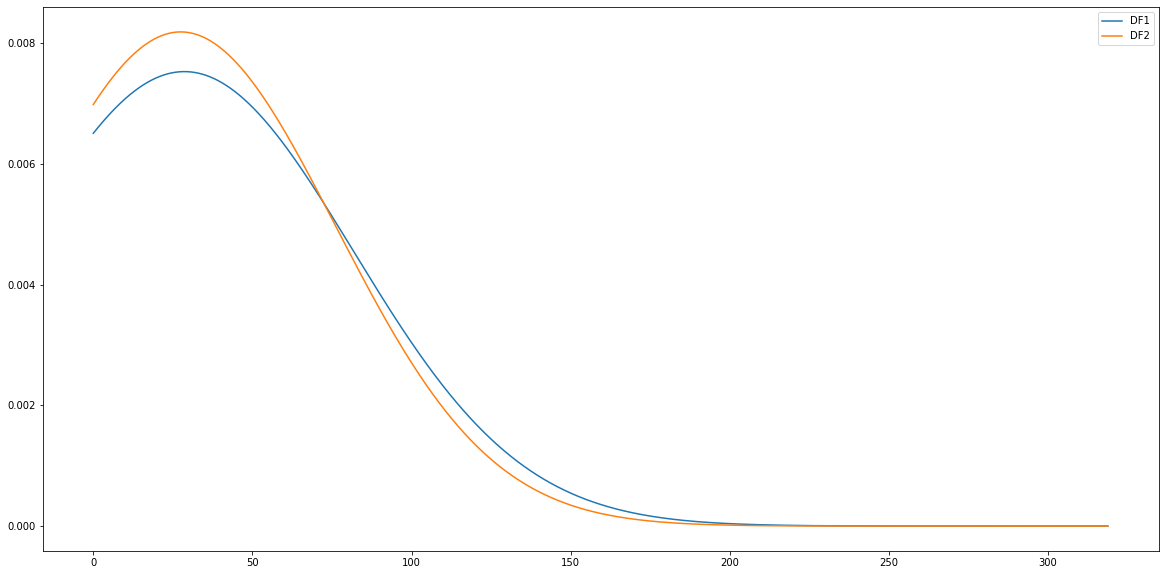

gle_cgdpc


<Figure size 1440x720 with 0 Axes>

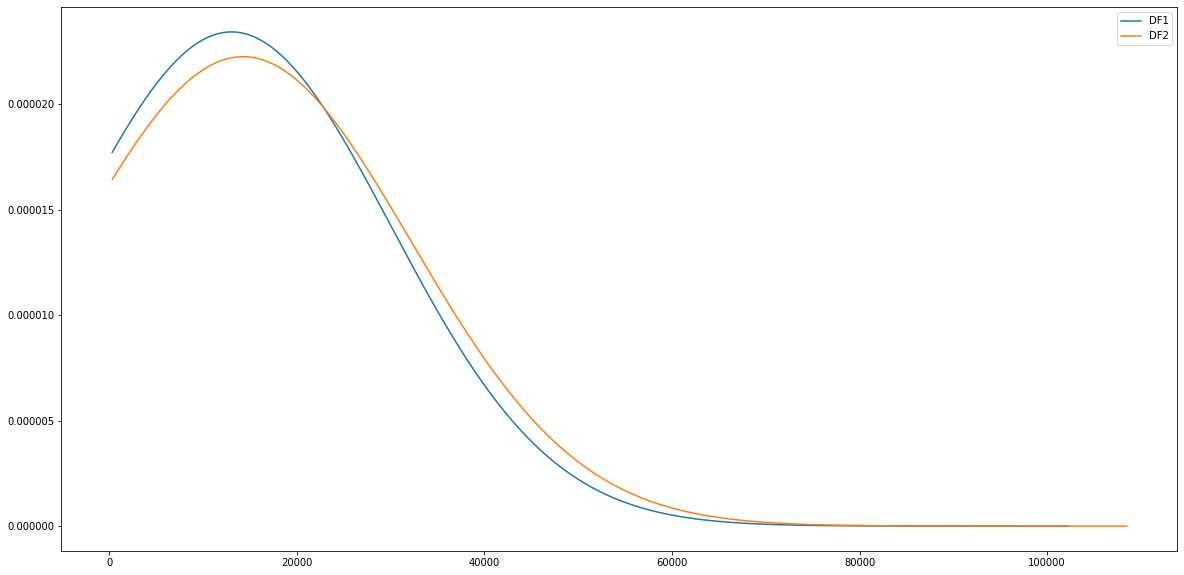

undp_hdi


<Figure size 1440x720 with 0 Axes>

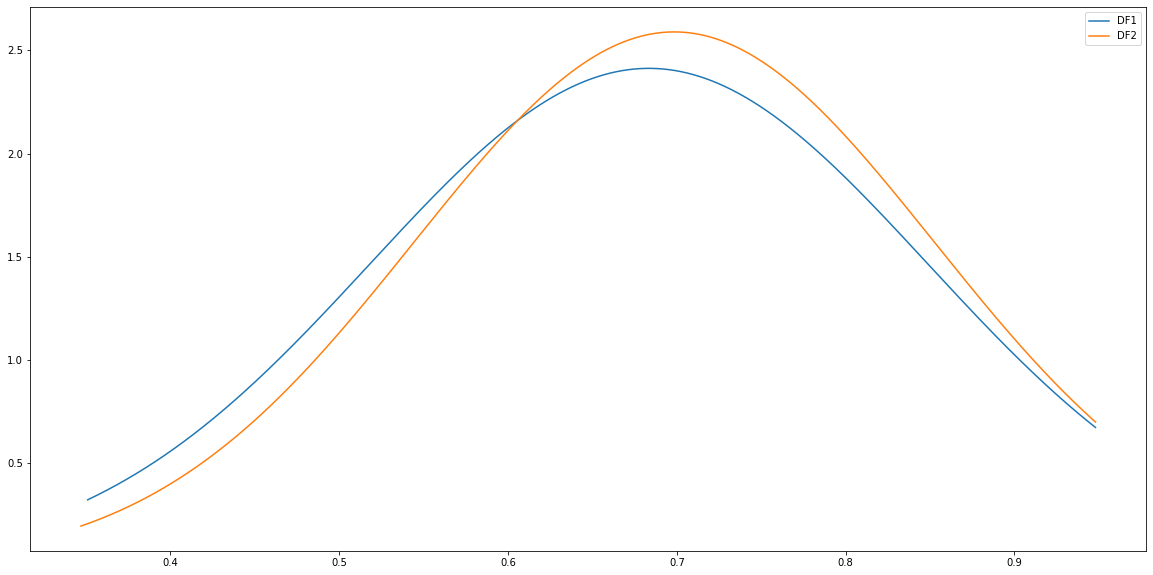

In [19]:
for i in ["imf_pop", "gle_cgdpc", "undp_hdi" ]:
    print(i)
    plt.figure(figsize=(20, 10))
    curva_densidad(df1, df2, i, log=True, puntos= 4000)
    plt.show()

 ¿En  qué  casos  es  necesario utilizar logaritmos? ¿Por qué?

Es necesario utilizar logaritmos cuando se busca una distribucion más normalizada que no tenga gran peso en las colas. Es una transformacion para quitar desvios, para balancear. 

Para distribuciones asimétricas positivas se usan las transformaciones √x, ln(x) y 1/x, que comprimen los valores altos y expanden los pequeños.

imf_pop


<Figure size 1440x720 with 0 Axes>

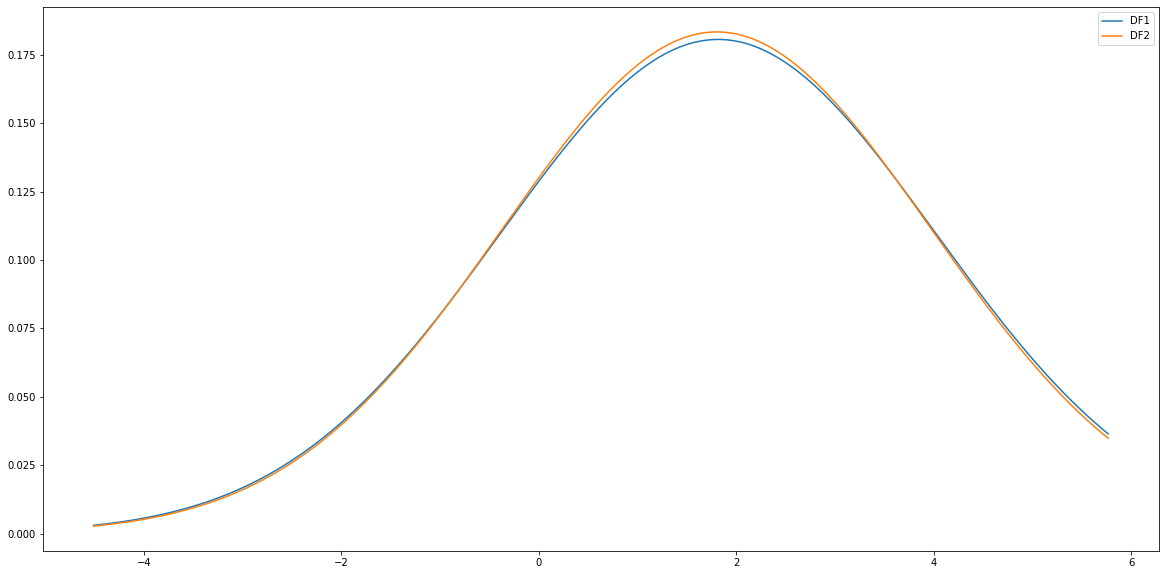

gle_cgdpc


<Figure size 1440x720 with 0 Axes>

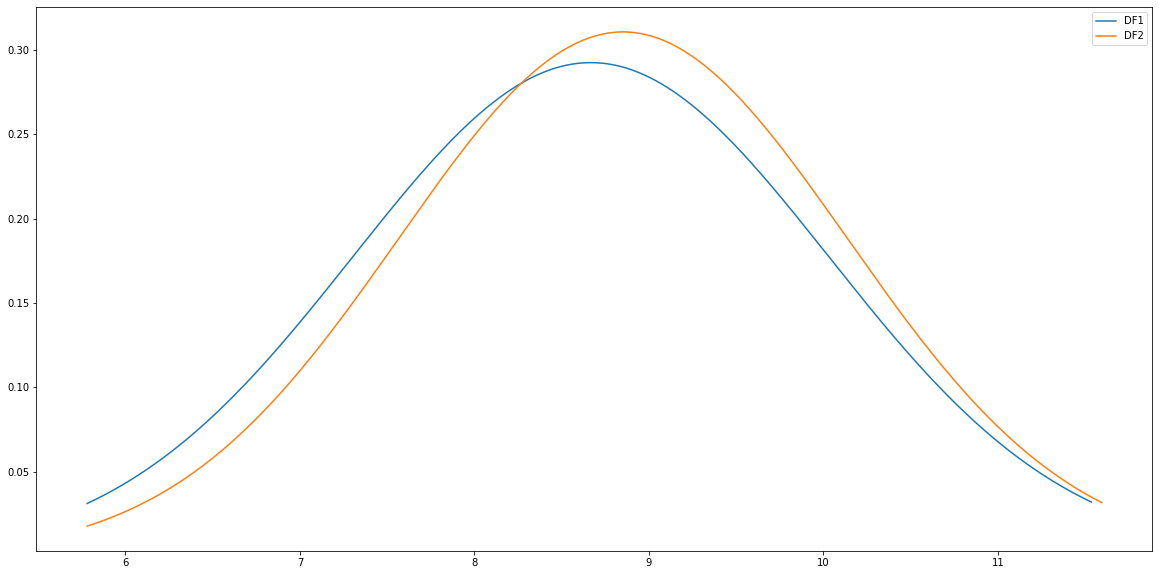

In [20]:
for i in ["imf_pop", "gle_cgdpc"]:
    print(i)
    plt.figure(figsize=(20, 10))
    curva_densidad(df1, df2, i, log=False, puntos= 4000)
    plt.show()